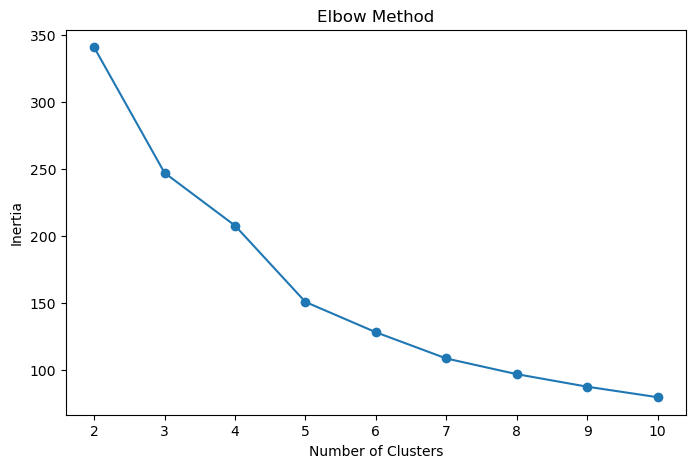

Davies-Bouldin Index: 1.060424039992303


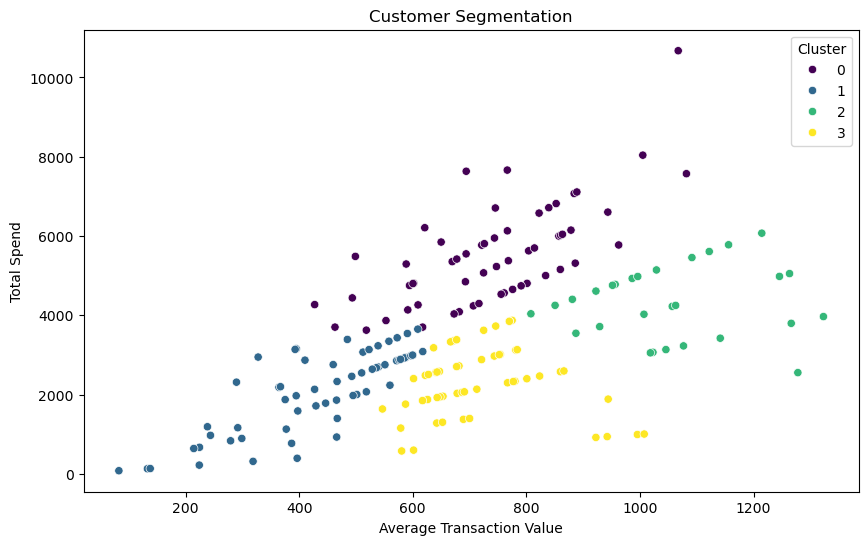

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv('data/Customers.csv')
transactions = pd.read_csv('data/Transactions.csv')
products = pd.read_csv('data/Products.csv')

# Feature Engineering
def create_features(customers, transactions, products):
    # Merge data
    data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
    
    # Aggregate features
    features = data.groupby('CustomerID').agg({
        'TotalValue': ['mean', 'sum'],
        'ProductID': 'count',
        'Region': lambda x: x.mode()[0]
    }).reset_index()
    
    features.columns = ['CustomerID', 'AvgTransactionValue', 'TotalSpend', 'PurchaseCount', 'Region']
    return features

features = create_features(customers, transactions, products)

# Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(features[['AvgTransactionValue', 'TotalSpend', 'PurchaseCount']])

# Determine optimal number of clusters using Elbow Method
inertia = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to features
features['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, clusters)
print(f'Davies-Bouldin Index: {db_index}')

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['AvgTransactionValue'], y=features['TotalSpend'], hue=features['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Average Transaction Value')
plt.ylabel('Total Spend')
plt.show()

# Save results
features.to_csv('Customer_Segmentation.csv', index=False)

Davies-Bouldin Index: 1.0072253641525208
Davies-Bouldin Index: 0.9578205962311452
Davies-Bouldin Index: 1.060424039992303
Davies-Bouldin Index: 0.8524813520458036
Davies-Bouldin Index: 0.8693770662816188
Davies-Bouldin Index: 0.8553114327404955
Davies-Bouldin Index: 0.912532003933697
Davies-Bouldin Index: 0.884755012352542
Davies-Bouldin Index: 0.8630460126564934


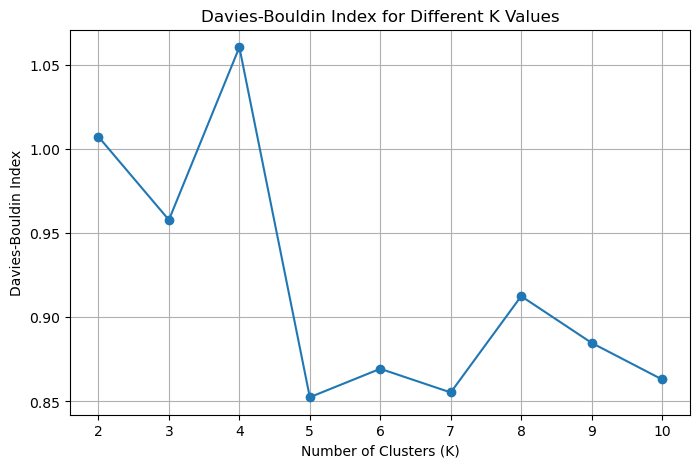

In [6]:
# Choose optimal number of clusters (e.g., 4)
db_index_values = []
for i in range(2,11):
    optimal_clusters = i
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Add cluster labels to features
    features['Cluster'] = clusters

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(X, clusters)
    print(f'Davies-Bouldin Index: {db_index}')
    db_index_values.append(db_index)

k_values = range(2, 11)  # Number of clusters (K)

# Plotting the Davies-Bouldin Index values
plt.figure(figsize=(8, 5))
plt.plot(k_values, db_index_values, marker='o', linestyle='-')
plt.title('Davies-Bouldin Index for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(k_values)
plt.grid(True)
plt.show()